# 数据准备

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 6
pd.options.display.float_format = '{:,.2}'.format

In [3]:
np.random.seed(42)
x = np.array([i * np.pi / 180 for i in range(-180, 60, 5)])
y = np.cos(x) + np.random.normal(0, 0.15, len(x))
data = pd.DataFrame(np.column_stack([x, y]), columns=['x', 'y'])

pow_max = 13

# 构造不同幂的x
for i in range(2, pow_max):
    colname = 'x_%d' % i
    data[colname] = data['x']**i

In [4]:
data.shape

(48, 13)

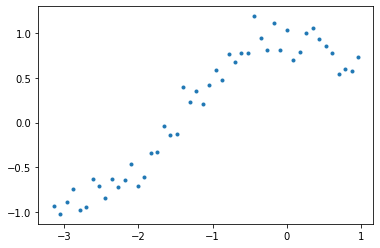

In [5]:
# 原始x散点图
plt.plot(data['x'],data['y'],'.')

# 普通线性回归

In [6]:
from sklearn.linear_model import LinearRegression


def myplot(x, y, y_pred, sub, title):
    plt.subplot(sub)
    plt.tight_layout()
    plt.plot(x, y_pred)
    plt.plot(x, y, '.')
    plt.title(title)


def summary(y, y_pred, intercept_, coef_):
    rss = sum((y_pred - y)**2)
    ret = [rss]
    ret.extend([intercept_])
    ret.extend(coef_)
    return ret


def linear_regression(data, power, models_to_plot):
    #设置预测变量x,x_2,x_3...
    predictors = ['x']
    if power >= 2:
        predictors.extend(['x_%d' % i for i in range(2, power + 1)])

    #线性拟合
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])

    # 绘制指定的幂的图形
    if power in models_to_plot:
        myplot(data['x'], data['y'], y_pred, \
               models_to_plot[power], 'power=%d' % power)

    # 记录模型拟合效果rss、截距和系数
    return summary(data['y'], y_pred, linreg.intercept_, linreg.coef_)

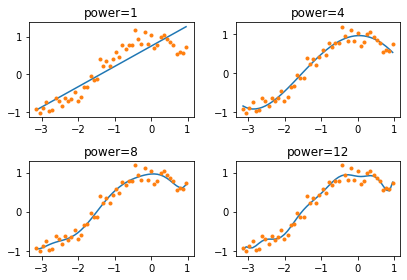

In [7]:
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, pow_max)]
ind = ['pow_%d' % i for i in range(1, pow_max)]
coef_matrix_linear = pd.DataFrame(index=ind, columns=col)

# 设置显示4个图形，分别幂为，1，4，8，12
models_to_plot = {1: 221, 4: 222, 8: 223, 12: 224}

# 拟合所有幂的变量
for i in range(1, pow_max):
    coef_matrix_linear.iloc[i - 1, 0:i + 2] = linear_regression(
        data, power=i, models_to_plot=models_to_plot)

In [8]:
# 系数矩阵为：
coef_matrix_linear

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12
pow_1,4.1,0.75,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_2,2.4,0.78,0.23,-0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_3,0.89,0.99,0.11,-0.56,-0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_4,0.85,0.96,0.043,-0.49,-0.038,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_5,0.75,0.96,-0.13,-0.58,0.17,0.18,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_6,0.74,0.95,-0.11,-0.5,0.17,0.11,-0.0093,-0.006,NaN,NaN,NaN,NaN,NaN,NaN
pow_7,0.74,0.96,-0.08,-0.59,0.044,0.16,0.1,0.042,0.0063,NaN,NaN,NaN,NaN,NaN
pow_8,0.71,0.96,0.072,-0.53,-0.49,-0.22,0.4,0.42,0.14,0.015,NaN,NaN,NaN,NaN
pow_9,0.7,0.96,0.092,-0.42,-0.53,-0.48,0.31,0.56,0.26,0.05,0.0036,NaN,NaN,NaN
pow_10,0.66,0.92,-0.0096,0.093,0.29,-1.5,-1.5,0.44,1.3,0.73,0.18,0.016,NaN,NaN


# Lasso回归

In [9]:
from sklearn.linear_model import Lasso


def lasso_regression(data, predictors, alpha, models_to_plot):
    lassoreg = Lasso(alpha=alpha, normalize=True, max_iter=1e6)
    lassoreg.fit(data[predictors], data['y'])
    y_pred = lassoreg.predict(data[predictors])

    # 绘制指定的alpha的图形
    if alpha in models_to_plot:
        myplot(data['x'], data['y'], y_pred, \
               models_to_plot[alpha], 'alpha=%.3g' % alpha)

    # 记录模型拟合效果rss、截距和系数
    return summary(data['y'], y_pred, lassoreg.intercept_, lassoreg.coef_)

In [10]:
# 拟合了所有的 x
predictors = ['x']
predictors.extend(['x_%d' % i for i in range(2, pow_max)])

# 设置正则系数
alpha_lasso = [
    1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 50
]


In [11]:
ind = ['alpha_%.2g' % alpha_lasso[i] for i in range(0, len(alpha_lasso))]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

/Users/chanson/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.35889189753831063, tolerance: 0.002422944771743981
  positive)
/Users/chanson/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3588163321205684, tolerance: 0.002422944771743981
  positive)
/Users/chanson/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.35138644798246516, tolerance: 0.002422944771743981
  positive)


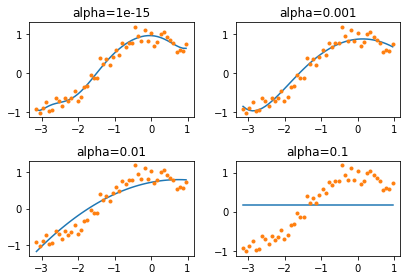

In [12]:
models_to_plot = {1e-15: 221, 1e-3: 222, 1e-2: 223, 1e-1: 224}

for i in range(len(alpha_lasso)):
    coef_matrix_lasso.iloc[i, ] = lasso_regression(data, predictors,
                                                   alpha_lasso[i],
                                                   models_to_plot)

In [18]:
pd.options.display.float_format = '{:,.2g}'.format

coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12
alpha_1e-15,0.72,0.96,-0.043,-0.55,-0.052,0.11,0.16,0.062,0.0016,0.00032,0.00061,-0.00014,1.1e-05,1.7e-05
alpha_1e-10,0.72,0.96,-0.043,-0.55,-0.052,0.11,0.16,0.062,0.0016,0.00032,0.00061,-0.00014,1.1e-05,1.7e-05
alpha_1e-08,0.72,0.96,-0.044,-0.55,-0.05,0.11,0.16,0.062,0.0015,0.00027,0.0006,-0.00014,1e-05,1.7e-05
alpha_0.0001,0.78,0.95,0.017,-0.46,0,0.012,-0.0078,0,-0,0,0,-0,0,-9.3e-07
alpha_0.001,1.1,0.87,0.082,-0.3,-0,0,-0,0.0015,-0,0,-0,0,-0,-0
alpha_0.01,2.7,0.72,0.2,-0.13,0,-0,0,0,-0,0,-0,0,-0,0
alpha_0.1,24,0.16,0,-0,0,-0,0,-0,0,-0,0,-0,0,-0
alpha_1,24,0.16,0,-0,0,-0,0,-0,0,-0,0,-0,0,-0
alpha_5,24,0.16,0,-0,0,-0,0,-0,0,-0,0,-0,0,-0
alpha_10,24,0.16,0,-0,0,-0,0,-0,0,-0,0,-0,0,-0


# ridge回归

In [14]:
from sklearn.linear_model import Ridge

def ridge_regression(data, predictors, alpha, models_to_plot):
    ridgereg = Ridge(alpha=alpha, normalize=True)
    ridgereg.fit(data[predictors], data['y'])
    y_pred = ridgereg.predict(data[predictors])

    # 绘制指定的alpha的图形
    if alpha in models_to_plot:
        myplot(data['x'], data['y'], y_pred, \
               models_to_plot[alpha], 'alpha=%.3g' % alpha)

    # 记录模型拟合效果rss、截距和系数
    return summary(data['y'], y_pred, ridgereg.intercept_, ridgereg.coef_)

In [15]:
# 拟合了所有的 x
predictors = ['x']
predictors.extend(['x_%d' % i for i in range(2, pow_max)])

# 设置正则系数
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 50]

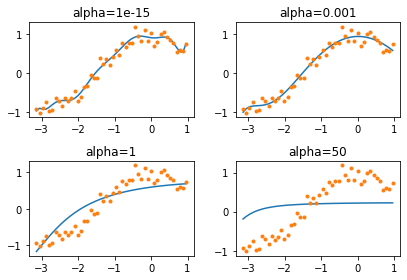

In [16]:
ind = ['alpha_%.2g' % alpha_ridge[i] for i in range(0, len(alpha_ridge))]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15: 221, 1e-3: 222, 1: 223, 50: 224}
for i in range(len(alpha_ridge)):
    coef_matrix_ridge.iloc[i, ] = ridge_regression(data, predictors,
                                                   alpha_ridge[i],
                                                   models_to_plot)

In [17]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12
alpha_1e-15,0.62,0.9,-0.12,0.56,1.2,-2.9,-3.8,1.4,3.7,1.2,-0.53,-0.46,-0.11,-0.0096
alpha_1e-10,0.66,0.94,-0.014,-0.095,0.24,-1.1,-1.3,0.31,1.1,0.65,0.1,-0.024,-0.01,-0.001
alpha_1e-08,0.71,0.96,0.018,-0.58,-0.29,-0.021,0.29,0.24,0.08,0.013,0.0004,-0.00022,0.00011,3.4e-05
alpha_0.0001,0.74,0.95,-0.047,-0.45,0.079,0.034,-0.0081,0.0024,-0.00012,-0.00012,7.1e-05,-2.1e-05,2e-06,2.3e-06
alpha_0.001,0.78,0.94,0.011,-0.42,0.018,0.01,-0.0047,0.0014,-0.00026,2.3e-05,9.2e-06,-6.1e-06,2.2e-06,-4.9e-07
alpha_0.01,0.99,0.87,0.091,-0.29,0.018,0.00085,-0.0022,0.00084,-0.00025,5.8e-05,-8.8e-06,-6.7e-07,1.4e-06,-7.9e-07
alpha_0.1,1.9,0.77,0.2,-0.12,0.018,-0.0033,0.00023,7.7e-05,-5.4e-05,2.1e-05,-7.1e-06,2.1e-06,-5.7e-07,1.4e-07
alpha_1,4.6,0.59,0.13,-0.049,0.012,-0.0028,0.00064,-0.00013,2.4e-05,-2.8e-06,-3.8e-07,4.6e-07,-2.4e-07,1e-07
alpha_5,9.8,0.41,0.056,-0.021,0.0058,-0.0016,0.00046,-0.00013,3.6e-05,-1e-05,2.8e-06,-8e-07,2.3e-07,-6.4e-08
alpha_10,13,0.34,0.035,-0.014,0.004,-0.0012,0.00035,-0.0001,3e-05,-9e-06,2.7e-06,-8e-07,2.4e-07,-7.3e-08
